# Manual Recheck 

## complemented for manualcheck.py

In [1]:
import glob
import matplotlib.pyplot as plt

In [2]:
match_base = './io/match/'
image_base = './io/image/'
hst_base = './io/match/'

## Processing which image?

In [11]:
img_name = 'nircam2'

match_dir = match_base + img_name + '/'

## MatchCat will help

In [12]:
from utils.matchcat import MatchCat

In [13]:
hst_dir = hst_base + img_name +'/'
hst_path = glob.glob(hst_dir + 'egs*.fits')[0]
matc = MatchCat(img_name, match_dir=match_dir)

## Interactive checking

In [18]:
from photutils.segmentation import SegmentationImage
def plot_image(id,cmap,vmin,vmax,norm):
    hst_cutout, jwst_cutout, segm_cutout = matc.get_image(hst_path, id, img_size=100)
    segm_cutout = SegmentationImage(segm_cutout)
    fig, ax = plt.subplots(1,3, figsize=(12,4))
    ax[0].imshow(hst_cutout, origin='lower', cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
    ax[0].set_title('HST')
    ax[1].imshow(jwst_cutout, origin='lower', cmap=cmap, vmin=vmin*10, vmax=vmax*10, norm=norm)
    ax[1].set_title('JWST')
    segm_cutout.imshow(ax=ax[2])
    ax[2].set_title('Segmentation')
    ax[2].plot(hst_cutout.shape[0]//2,hst_cutout.shape[1]//2, 'rx')
    print(segm_cutout.data[hst_cutout.shape[0]//2,hst_cutout.shape[1]//2])
    plt.show()

In [19]:
from ipywidgets import interact, widgets
# Create a slider widget
cmap_dropdown = widgets.Dropdown(options=['viridis','gray','hot','jet','binary'],value='viridis',description='cmap')
vmin_slider = widgets.FloatSlider(min=0., max=0.002, step=.00002, value=0.)
vmax_slider = widgets.FloatSlider(min=0.002, max=0.02, step=.0002, value=.01)
norm_dropdown = widgets.Dropdown(options=['linear','log','asinh'],value='linear',description='norm')
i_text = widgets.IntSlider(min=0,max=matc.nmatch()-1,step=1,value=0,description='id')
#Text(value='0',description='seq')

# Use the interact function to update the plot when the slider is changed
_=interact(plot_image, id=i_text,cmap=cmap_dropdown,vmin=vmin_slider,vmax=vmax_slider,norm=norm_dropdown)

interactive(children=(IntSlider(value=0, description='id', max=114), Dropdown(description='cmap', options=('vi…

In [20]:
id = 83
_ , jwst_cutout, segm_cutout = matc.get_image(hst_path, id, img_size=100)
segm_cutout = SegmentationImage(segm_cutout)

Object 84 of 115: 38352


Deblending:   0%|          | 0/21 [00:00<?, ?it/s]

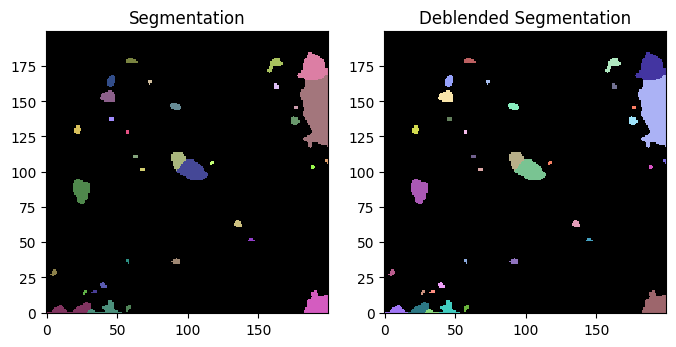

In [21]:
from photutils.segmentation import deblend_sources
segm_deblend = deblend_sources(jwst_cutout, segm_cutout, npixels=5, contrast=0.005, nlevels=4, mode='sinh')
fig, ax = plt.subplots(1,2, figsize=(8,4))
segm_cutout.imshow(ax=ax[0])
ax[0].set_title('Segmentation')
segm_deblend.imshow(ax=ax[1])
ax[1].set_title('Deblended Segmentation')
plt.show()